In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_raw = pd.read_csv('./stroke_data_dummies.csv')

In [3]:
df_r = df_raw[df_raw.Gender_Other == 0]

In [4]:
def glucose_check(x):
    if x >= 140:
        return 1
    else:
        return 0
    
df_r['diabetes'] = df_r.avg_glucose_level.apply(glucose_check)

In [5]:
df = df_r.drop(columns = ['Unnamed: 0','id','Obesity','Gender_Other','avg_glucose_level'])

In [6]:
df.head()

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban,diabetes
0,67.0,0,1,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1
1,80.0,0,1,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0
2,49.0,0,0,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1
3,79.0,1,0,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1
4,81.0,0,0,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [7]:
X = df.drop(columns = ['stroke', 'diabetes'])
X

,age,hypertension,heart_disease,bmi,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,36.6,1,0,1,0,0,1,0,0,0,1,0,0,0,1
1,80.0,0,1,32.5,1,0,1,0,0,1,0,0,0,0,1,0,1,0
2,49.0,0,0,34.4,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,24.0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,29.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4904,13.0,0,0,18.6,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,0,40.0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,0,30.6,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4907,51.0,0,0,25.6,1,0,1,0,0,1,0,0,0,1,0,0,1,0


In [8]:
df_0 = df[df['diabetes'] == 0]
df_0 = df_0.drop(columns = ['diabetes'])
df_0

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
1,80.0,0,1,32.5,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
5,74.0,1,1,27.4,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
6,69.0,0,0,22.8,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
7,78.0,0,0,24.2,1,1,1,0,0,0,1,0,0,1,0,0,0,0,1
8,81.0,1,0,29.7,1,1,1,0,0,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4903,18.0,0,0,46.9,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
4904,13.0,0,0,18.6,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
4905,81.0,0,0,40.0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1
4906,35.0,0,0,30.6,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0


In [9]:
df_1 = df[df['diabetes'] == 1]
df_1 = df_1.drop(columns = ['diabetes'])
df_1

,age,hypertension,heart_disease,bmi,stroke,marriage,Gender_Female,Gender_Male,Work_Govt_job,Work_Never_worked,Work_Private,Work_Self-employed,Work_children,smoking_Unknown,smoking_formerly smoked,smoking_never smoked,smoking_smokes,Residence_Rural,Residence_Urban
0,67.0,0,1,36.6,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
2,49.0,0,0,34.4,1,1,1,0,0,0,1,0,0,0,0,0,1,0,1
3,79.0,1,0,24.0,1,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,81.0,0,0,29.0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1
11,79.0,0,1,28.2,1,1,1,0,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4865,39.0,0,0,27.7,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1
4866,70.0,0,0,24.3,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
4878,34.0,0,0,23.0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0
4888,51.0,0,0,21.8,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1


In [10]:
y_0 = df_0['stroke']
x_0 = df_0.drop(columns = ['stroke'])

In [11]:
y_1 = df_1['stroke']
x_1 = df_1.drop(columns = ['stroke'])

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Model for controlled group

In [13]:
rfc = RandomForestClassifier(random_state=60)
score_pre_0 = cross_val_score(rfc,x_0,y_0,cv=5).mean()
score_pre_0

0.9665382106041495

0.9670198483464544 41


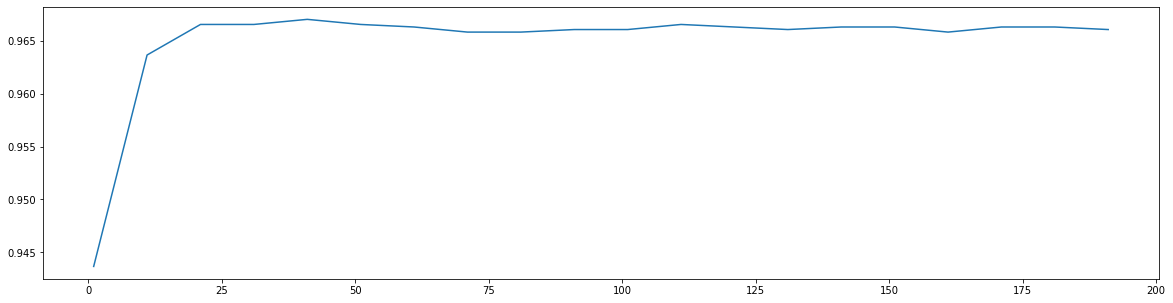

In [14]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.9670198483464544 40


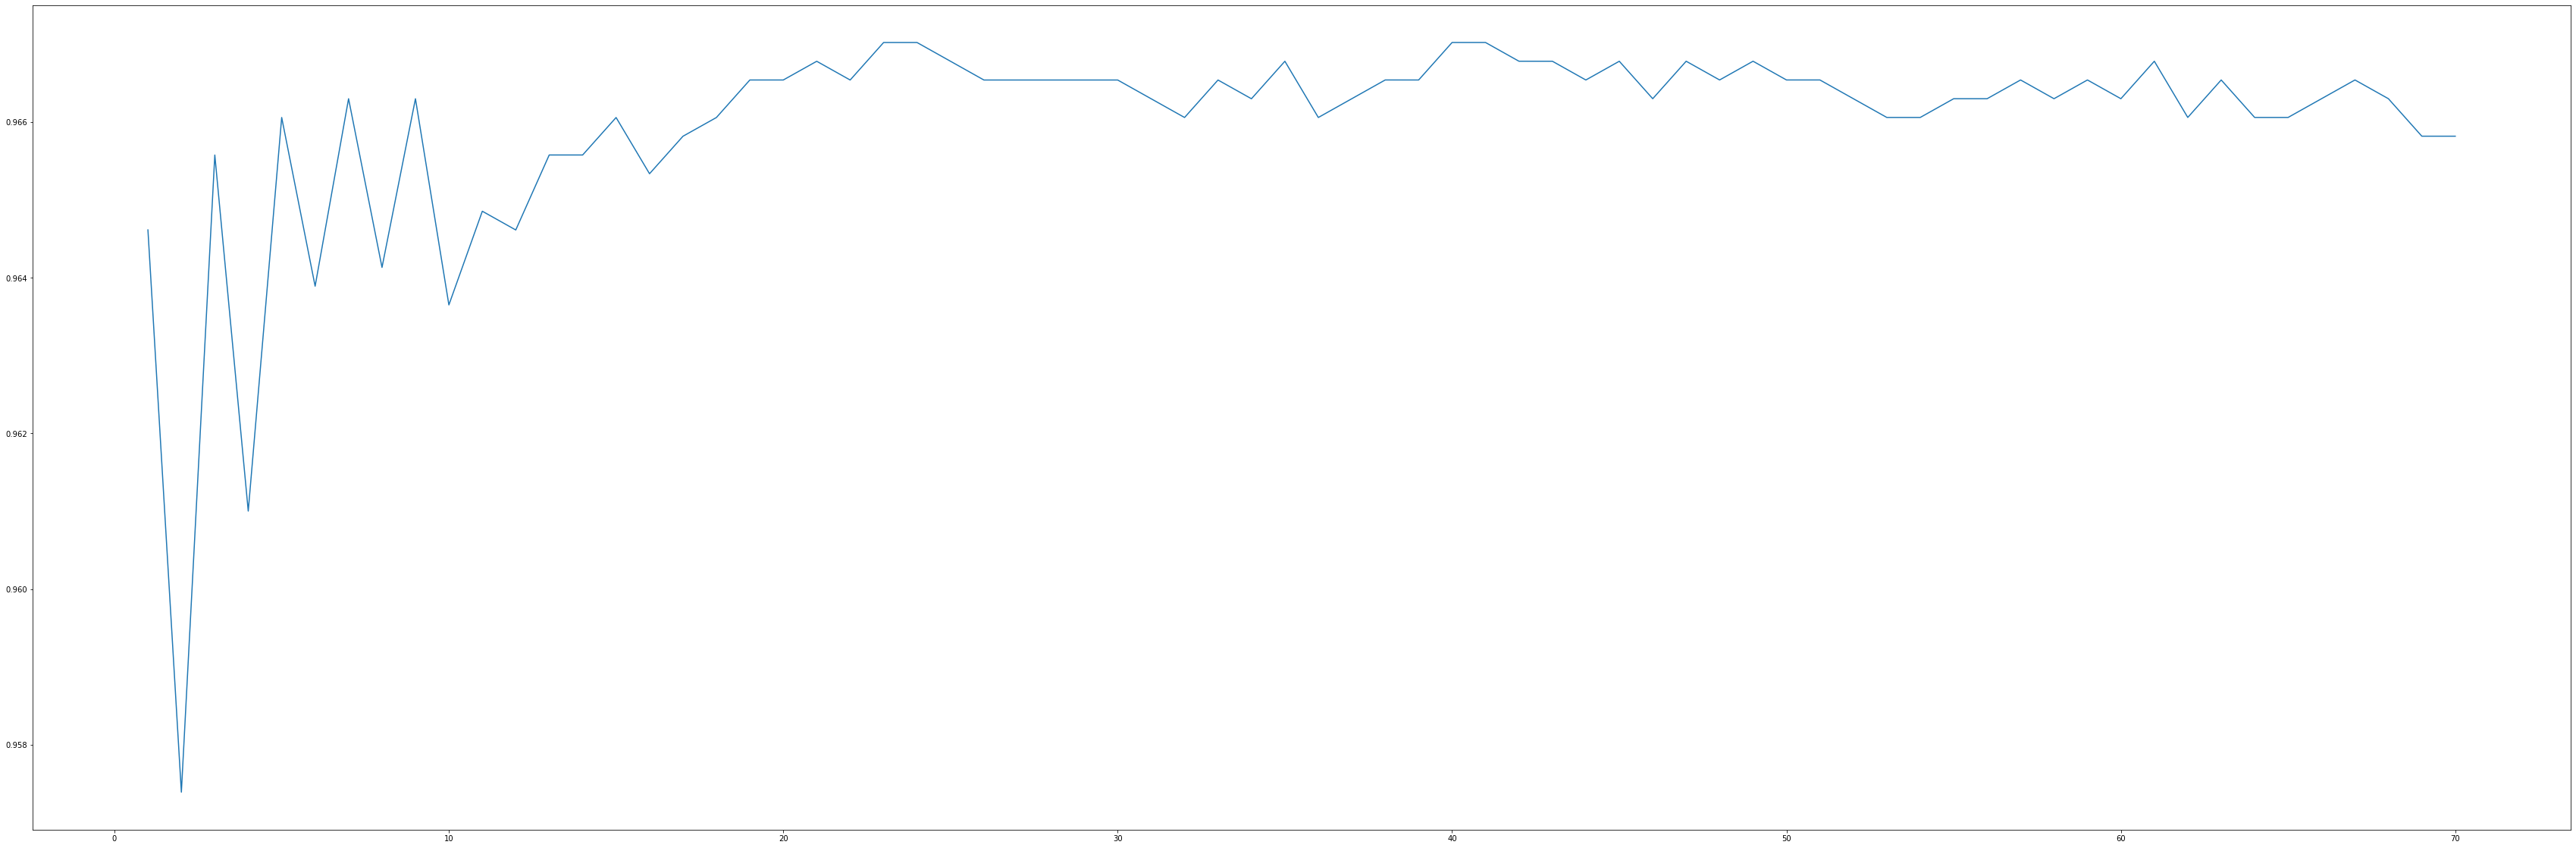

In [15]:
scorel = []
for i in range(1,71):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=60)
    score = cross_val_score(rfc,x_0,y_0,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(1,71)][scorel.index(max(scorel))]))
plt.figure(figsize=[60,20])
plt.plot(range(1,71),scorel)
plt.show()

In [16]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [17]:
GS.best_params_

{'max_depth': 1}

In [18]:
GS.best_score_

0.9689458193785974

In [19]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [20]:
GS.best_params_

{'max_features': 4}

In [21]:
GS.best_score_

0.9665382106041495

In [22]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [23]:
GS.best_params_

{'min_samples_leaf': 4}

In [24]:
GS.best_score_

0.9689458193785974

In [25]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=40
                             ,random_state=60
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_0,y_0)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=40, random_state=60),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [26]:
GS.best_params_

{'min_samples_split': 11}

In [27]:
GS.best_score_

0.9689458193785974

In [28]:
rfc_0 = RandomForestClassifier(n_estimators=40,max_depth = 1,random_state=60)
score_0 = cross_val_score(rfc_0,x_0,y_0,cv=5).mean()
score_0

0.9689458193785974

In [29]:
score_0 - score_pre_0

0.0024076087744479002

# Model for treatment group

In [30]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre_1 = cross_val_score(rfc,x_1,y_1,cv=5).mean()
score_pre_1

0.8833024282560705

0.8833112582781457 171


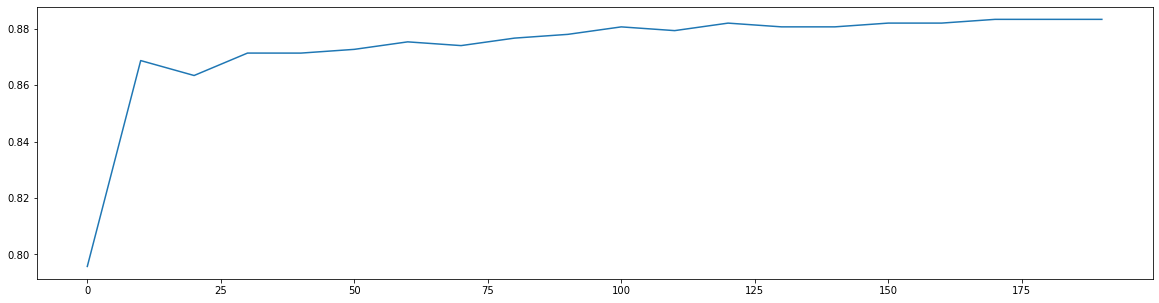

In [31]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(0,200,10),scorel)
plt.show()

0.8846357615894039 151


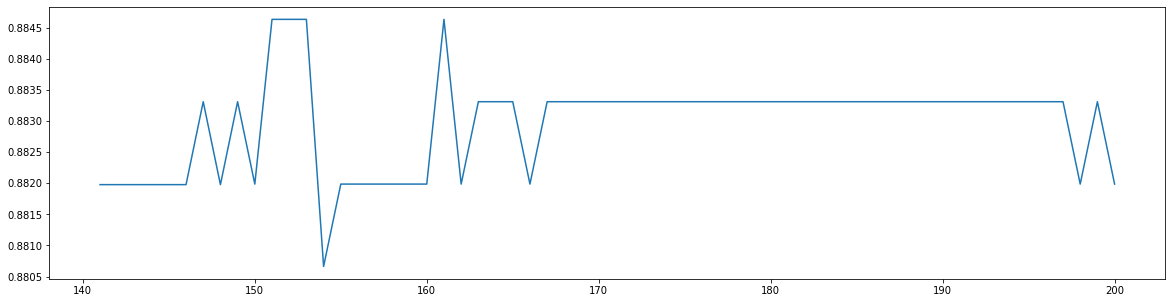

In [32]:
scorel = []
for i in range(141,201):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                 n_jobs=-1,
                                random_state=80)
    score = cross_val_score(rfc,x_1,y_1,cv=5).mean()
    scorel.append(score)

print(max(scorel),([*range(141,201)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(141,201),scorel)
plt.show()

In [33]:
param_grid = {'max_depth':np.arange(1, 30, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [34]:
GS.best_params_

{'max_depth': 7}

In [35]:
GS.best_score_

0.8952317880794702

In [36]:
param_grid = {'max_features':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [37]:
GS.best_params_

{'max_features': 8}

In [38]:
GS.best_score_

0.8833112582781457

In [39]:
param_grid={'min_samples_leaf':np.arange(1, 20, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [40]:
GS.best_params_

{'min_samples_leaf': 4}

In [41]:
GS.best_score_

0.8938984547461368

In [42]:
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=151
                             ,random_state=80
                             )
GS = GridSearchCV(rfc,param_grid,cv=5)
GS.fit(x_1,y_1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=151,
                                              random_state=80),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [43]:
GS.best_params_

{'min_samples_split': 12}

In [44]:
GS.best_score_

0.8938984547461368

In [45]:
rfc_1 = RandomForestClassifier(n_estimators=151,max_depth = 7, random_state=80)
score_1 = cross_val_score(rfc_1,x_1,y_1,cv=5).mean()
score_1

0.8952317880794702

In [46]:
score_1 - score_pre_1

0.01192935982339971

# Outcome modeling

In [47]:
from scipy import stats
import scipy.stats

In [48]:
rfc0 = rfc_0.fit(x_0, y_0)

In [49]:
predict_0 = rfc0.predict(X)
mean_0 = predict_0.mean()
mean_0

0.0

In [50]:
rfc1 = rfc_1.fit(x_1, y_1)

In [51]:
predict_1 = rfc1.predict(X)
mean_1 = predict_1.mean()
mean_1

0.002037489812550937

In [52]:
ATE_outcome = mean_1 - mean_0
ATE_outcome

0.002037489812550937

In [53]:
t,pval = scipy.stats.ttest_ind(predict_0,predict_1,equal_var=False,alternative='less')
print(t,pval)

-3.165181645162925 0.0007796715253973722
